<a href="https://colab.research.google.com/github/CastanharoA/_projetos/blob/master/regr_IC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  2 of 2 completed


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

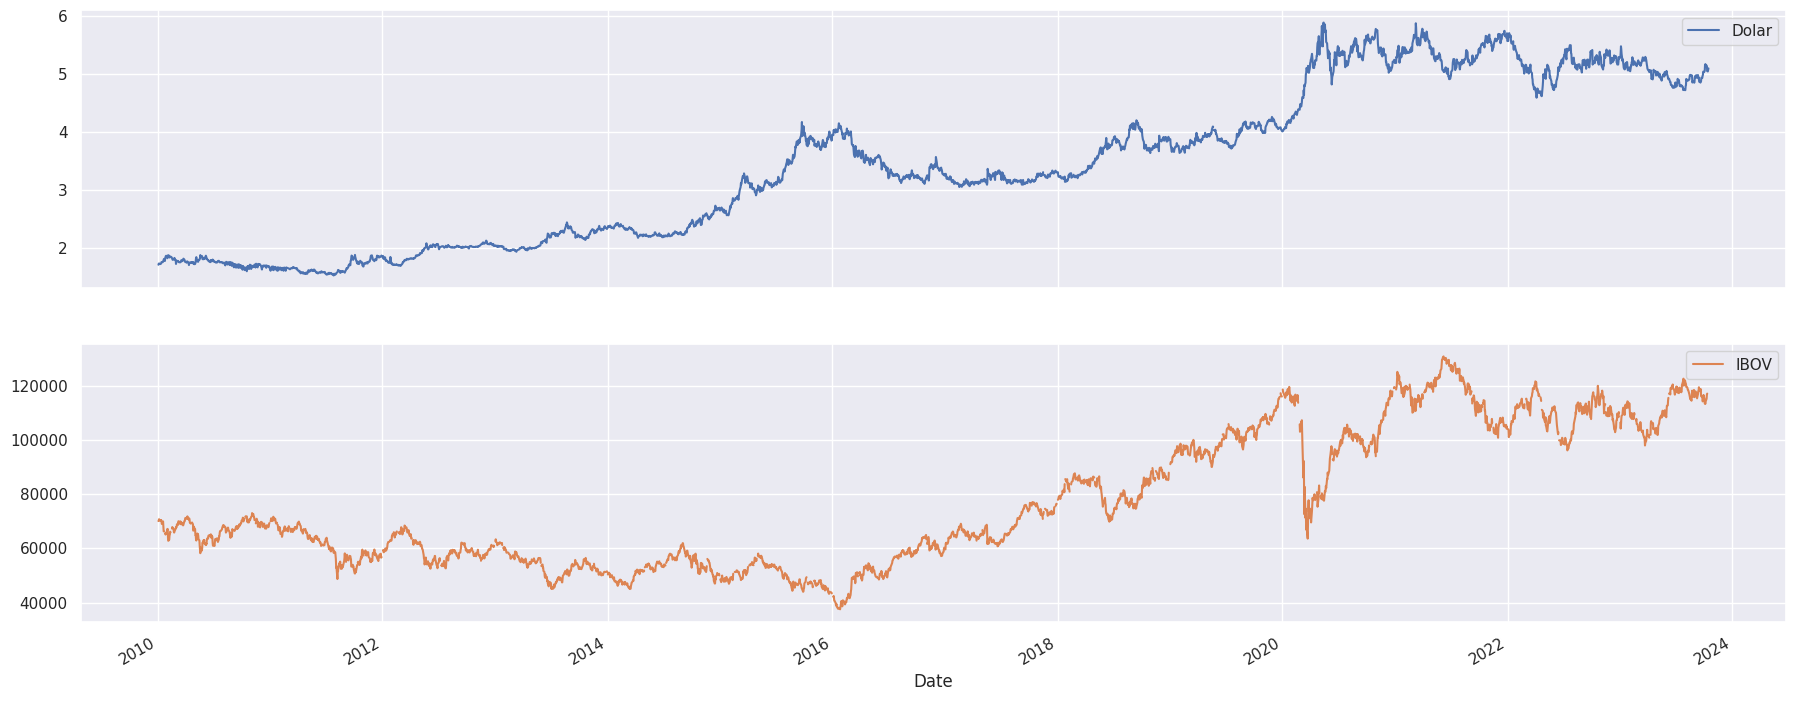

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Baixar os dados do Yahoo Finance
ativos = "^BVSP USDBRL=X"
carteira = yf.download(ativos, start="2010-01-01")["Close"]
carteira.columns = ["Dolar", "IBOV"]

# Plot dos dados
sns.set()
carteira.plot(subplots=True, figsize=(22, 9))



Dolar    3407
IBOV     3407
dtype: int64

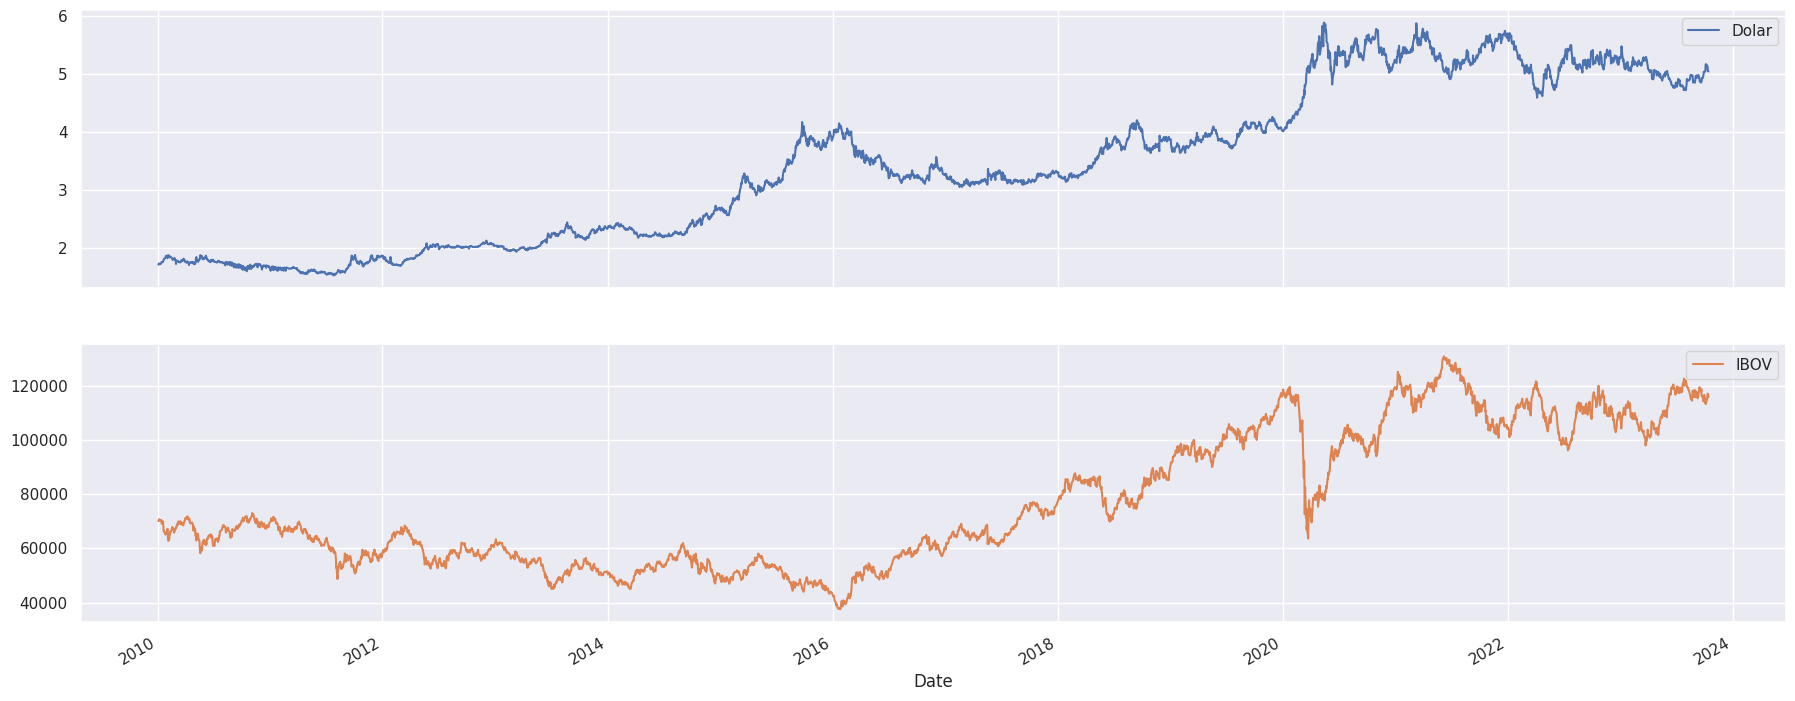

In [ ]:
# Remover dados faltantes (NaN)
carteira = carteira.dropna()

# Plot dos dados
sns.set()
carteira.plot(subplots=True, figsize=(22, 9))
carteira.head()
carteira.count()

<Axes: >

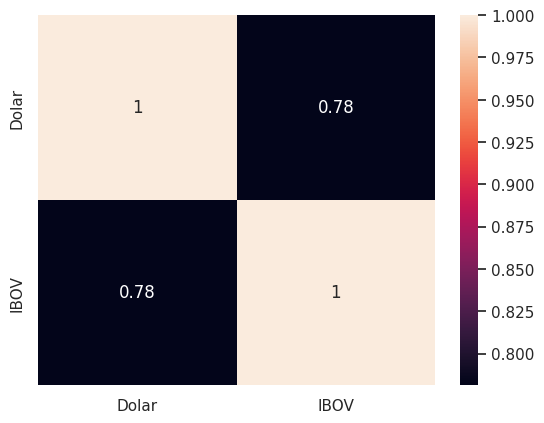

In [ ]:
sns.heatmap(carteira.corr(), annot=True)

In [ ]:
retornos = carteira.pct_change()[1:]
retornos

retornos.head()
retornos.count()


Dolar    3406
IBOV     3406
dtype: int64

In [ ]:
retornos.describe()

,Dolar,IBOV
count,3406.000000,3406.000000
mean,0.000379,0.000265
std,0.011227,0.015293
min,-0.061808,-0.147797
25%,-0.005913,-0.008146
50%,0.000271,0.000274
75%,0.006437,0.008879
max,0.075190,0.139082


<Axes: >

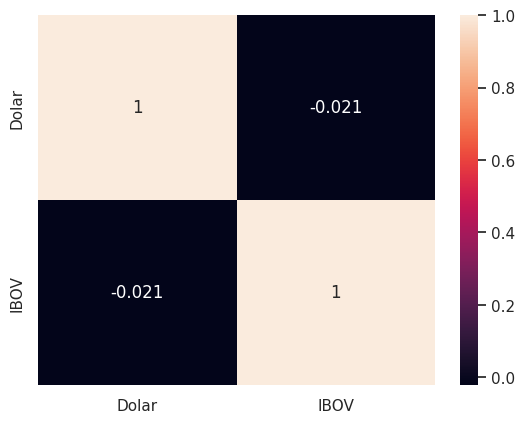

In [ ]:



sns.heatmap(retornos.corr(), annot=True)

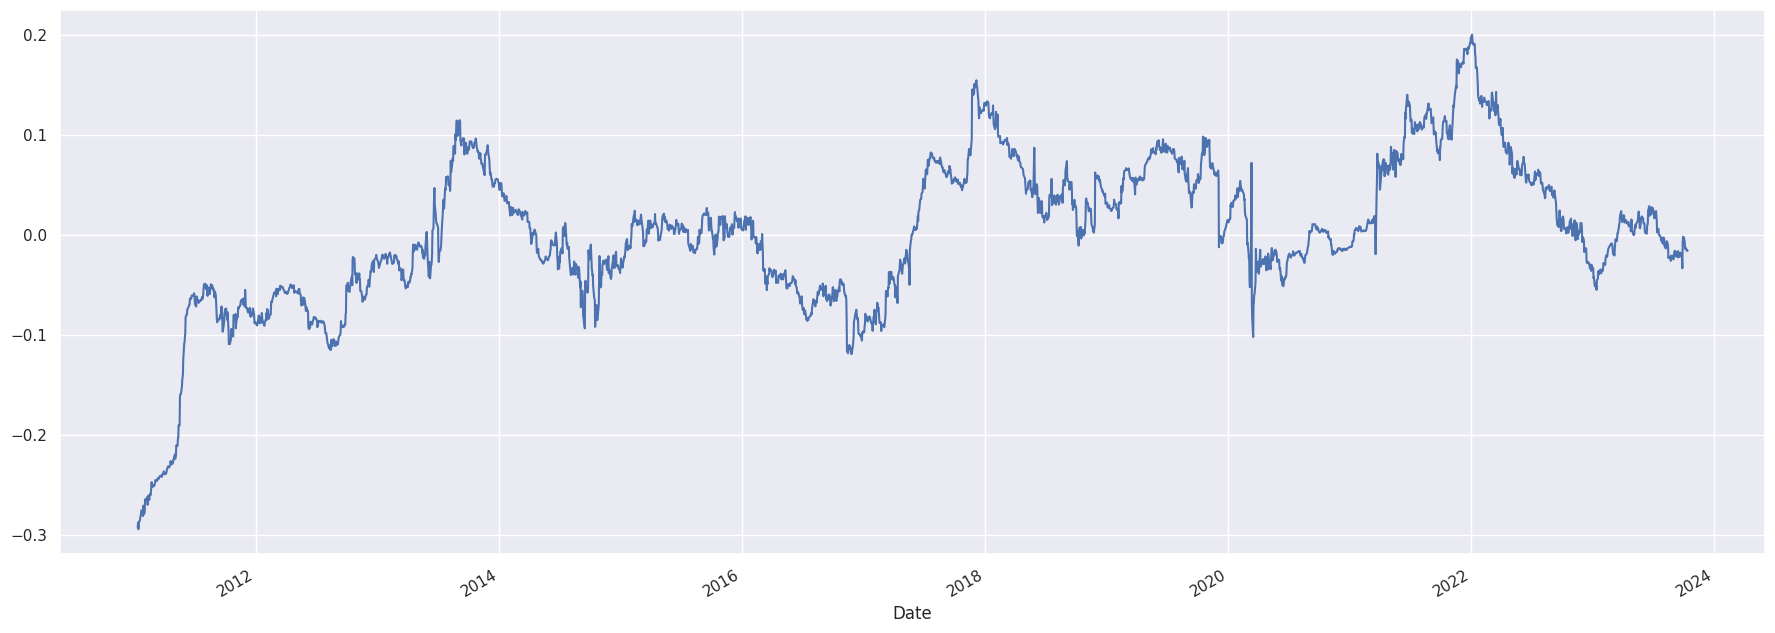

In [ ]:
from matplotlib.legend import Legend
retornos1 =retornos["Dolar"].rolling(252).corr(retornos["IBOV"]).plot(figsize=(22,8))


Média Dólar: 3.4216, Desvio Padrão Dólar: 1.3164
Média IBOV: 77026.2058, Desvio Padrão IBOV: 24671.7410

Coeficientes de Regressão:
[26910.82961382 14646.58752417]

Matriz de Correlação:
          Dolar      IBOV
Dolar  1.000000  0.781517
IBOV   0.781517  1.000000

Correlações de Partes:
          Dolar      IBOV
Dolar  1.000000  0.781517
IBOV   0.781517  1.000000

Correlações Parciais:
[5.36425981e-248 0.00000000e+000]

Múltiplo R (R²): 0.6108
R² Ajustado: 0.6107
Mudança em R²: 0.0001
Erro Padrão da Tabela de Estimativa: 236992134.3874
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     5343.
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:29:44   Log-Likelihood:       

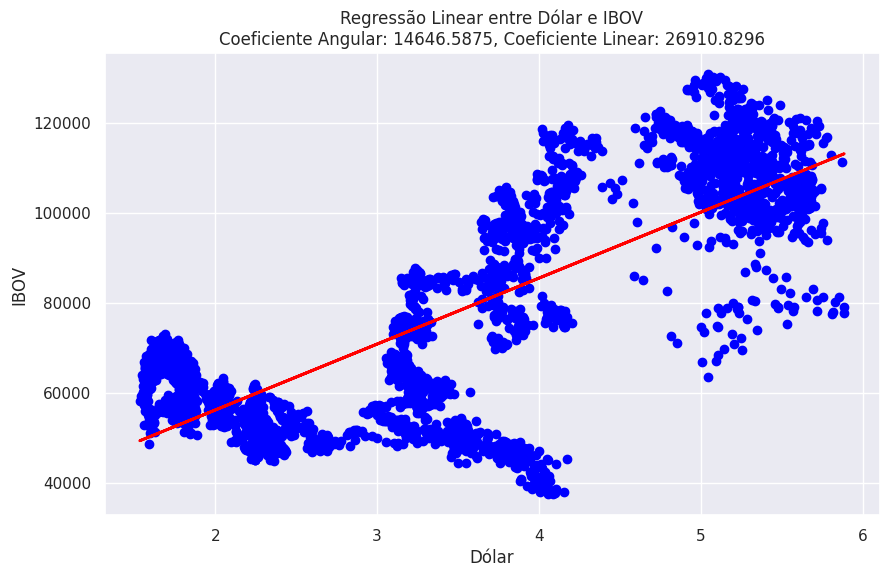

In [ ]:

# Estatísticas descritivas
media_dolar = carteira["Dolar"].mean()
desvio_padrao_dolar = carteira["Dolar"].std()
media_ibov = carteira["IBOV"].mean()
desvio_padrao_ibov = carteira["IBOV"].std()

# Regressão Linear
X = carteira["Dolar"].values.reshape(-1, 1)  # Dólar como variável independente (X)
y = carteira["IBOV"].values  # IBOV como variável dependente (y)

X = sm.add_constant(X)  # Adicionar uma constante para o termo linear

model = sm.OLS(y, X).fit()

# Estatísticas de regressão
coeficientes = model.params
matriz_correlacao = carteira.corr()
correlacao_partes = carteira.corr(method='pearson')
correlacoes_parciais = model.pvalues

# Outras estatísticas
r_squared = model.rsquared
r_squared_adj = model.rsquared_adj
change_r_squared = r_squared - r_squared_adj
std_error = model.mse_resid


valores_previstos = model.fittedvalues
residuos = model.resid

# Exibindo estatísticas
print(f"Média Dólar: {media_dolar:.4f}, Desvio Padrão Dólar: {desvio_padrao_dolar:.4f}")
print(f"Média IBOV: {media_ibov:.4f}, Desvio Padrão IBOV: {desvio_padrao_ibov:.4f}")

print("\nCoeficientes de Regressão:")
print(coeficientes)

print("\nMatriz de Correlação:")
print(matriz_correlacao)

print("\nCorrelações de Partes:")
print(correlacao_partes)

print("\nCorrelações Parciais:")
print(correlacoes_parciais)

print(f"\nMúltiplo R (R²): {r_squared:.4f}")
print(f"R² Ajustado: {r_squared_adj:.4f}")
print(f"Mudança em R²: {change_r_squared:.4f}")
print(f"Erro Padrão da Tabela de Estimativa: {std_error:.4f}")
print(model.summary())
print("\nAnálise de Variância:")


print("\nValores Previstos:")
print(valores_previstos)

print("\nResíduos:")
print(residuos)

# Plot da reta de regressão
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], y, color='blue')
plt.plot(X[:, 1], model.predict(X), color='red', linewidth=2)
plt.title(f'Regressão Linear entre Dólar e IBOV\nCoeficiente Angular: {coeficientes[1]:.4f}, Coeficiente Linear: {coeficientes[0]:.4f}')
plt.xlabel('Dólar')
plt.ylabel('IBOV')
plt.show()



Média Dólar: 0.0004, Desvio Padrão Dólar: 0.0112
Média IBOV: 0.0003, Desvio Padrão IBOV: 0.0153

Coeficientes de Regressão:
[ 0.00027614 -0.02906988]

Matriz de Correlação:
          Dolar      IBOV
Dolar  1.000000 -0.021341
IBOV  -0.021341  1.000000

Correlações de Partes:
          Dolar      IBOV
Dolar  1.000000 -0.021341
IBOV  -0.021341  1.000000

Correlações Parciais:
[0.29228004 0.2130648 ]

Múltiplo R (R²): 0.0005
R² Ajustado: 0.0002
Mudança em R²: 0.0003
Erro Padrão da Tabela de Estimativa: 0.0002
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.551
Date:                Sun, 15 Oct 2023   Prob (F-statistic):              0.213
Time:                        20:30:13   Log-Likelihood:                 9406.7
No. Observation

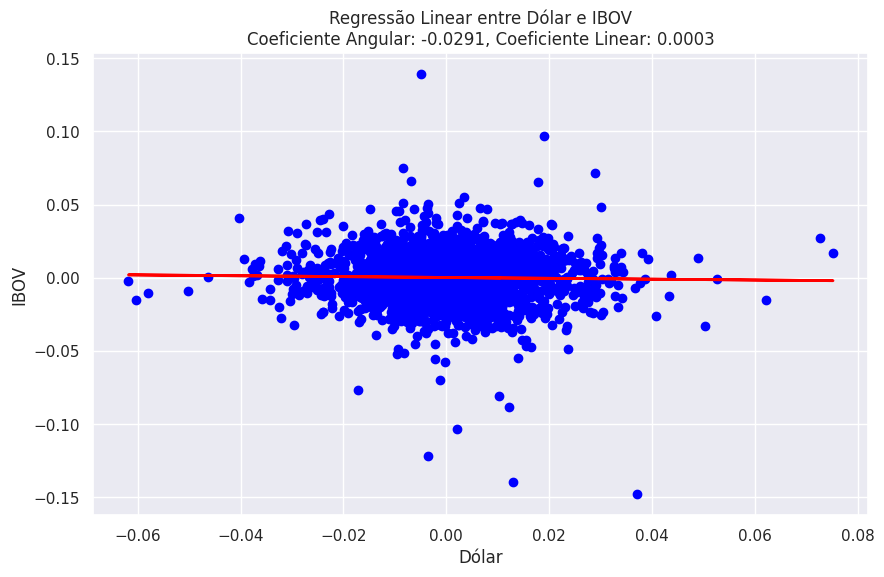

In [ ]:
 #Estatísticas descritivas
media_dolar = retornos["Dolar"].mean()
desvio_padrao_dolar = retornos["Dolar"].std()
media_ibov = retornos["IBOV"].mean()
desvio_padrao_ibov = retornos["IBOV"].std()

# Regressão Linear
X = retornos["Dolar"].values.reshape(-1, 1)  # Dólar como variável independente (X)
y = retornos["IBOV"].values  # IBOV como variável dependente (y)

X = sm.add_constant(X)  # Adicionar uma constante para o termo linear

model = sm.OLS(y, X).fit()

# Estatísticas de regressão
coeficientes = model.params
matriz_correlacao = retornos.corr()
correlacao_partes = retornos.corr(method='pearson')
correlacoes_parciais = model.pvalues

# Outras estatísticas
r_squared = model.rsquared
r_squared_adj = model.rsquared_adj
change_r_squared = r_squared - r_squared_adj
std_error = model.mse_resid


valores_previstos = model.fittedvalues
residuos = model.resid

# Exibindo estatísticas
print(f"Média Dólar: {media_dolar:.4f}, Desvio Padrão Dólar: {desvio_padrao_dolar:.4f}")
print(f"Média IBOV: {media_ibov:.4f}, Desvio Padrão IBOV: {desvio_padrao_ibov:.4f}")

print("\nCoeficientes de Regressão:")
print(coeficientes)

print("\nMatriz de Correlação:")
print(matriz_correlacao)

print("\nCorrelações de Partes:")
print(correlacao_partes)

print("\nCorrelações Parciais:")
print(correlacoes_parciais)

print(f"\nMúltiplo R (R²): {r_squared:.4f}")
print(f"R² Ajustado: {r_squared_adj:.4f}")
print(f"Mudança em R²: {change_r_squared:.4f}")
print(f"Erro Padrão da Tabela de Estimativa: {std_error:.4f}")
print(model.summary())
print("\nAnálise de Variância:")


print("\nValores Previstos:")
print(valores_previstos)

print("\nResíduos:")
print(residuos)

# Plot da reta de regressão
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], y, color='blue')
plt.plot(X[:, 1], model.predict(X), color='red', linewidth=2)
plt.title(f'Regressão Linear entre Dólar e IBOV\nCoeficiente Angular: {coeficientes[1]:.4f}, Coeficiente Linear: {coeficientes[0]:.4f}')
plt.xlabel('Dólar')
plt.ylabel('IBOV')
plt.show()



In [ ]:
# valores_previstos = model.fittedvalues
# residuos = model.resid

# Estatísticas de regressão
coeficientes = model.params
matriz_correlacao = carteira.corr()
correlacao_partes = carteira.corr(method='pearson')
correlacoes_parciais = model.pvalues

# Outras estatísticas
r_squared = model.rsquared
r_squared_adj = model.rsquared_adj
change_r_squared = r_squared - r_squared_adj
std_error = model.mse_resid


valores_previstos = model.fittedvalues
residuos = model.resid

In [ ]:
valores_previstos = model.fittedvalues
residuos = model.resid

# Exibindo estatísticas
print(f"Média Dólar: {media_dolar:.4f}, Desvio Padrão Dólar: {desvio_padrao_dolar:.4f}")
print(f"Média IBOV: {media_ibov:.4f}, Desvio Padrão IBOV: {desvio_padrao_ibov:.4f}")

print("\nCoeficientes de Regressão:")
print(coeficientes)

print("\nMatriz de Correlação:")
print(matriz_correlacao)

print("\nCorrelações de Partes:")
print(correlacao_partes)

print("\nCorrelações Parciais:")
print(correlacoes_parciais)

print(f"\nMúltiplo R (R²): {r_squared:.4f}")
print(f"R² Ajustado: {r_squared_adj:.4f}")
print(f"Mudança em R²: {change_r_squared:.4f}")
print(f"Erro Padrão da Tabela de Estimativa: {std_error:.4f}")
print(model.summary())
print("\nAnálise de Variância:")


print("\nValores Previstos:")
print(valores_previstos)

print("\nResíduos:")
print(residuos)

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Baixar os dados do Yahoo Finance
ativos = "^BVSP USDBRL=X"
carteira = yf.download(ativos, start="2019-01-01")["Close"]
carteira.columns = ["Dolar", "IBOV"]

# Plot dos dados
sns.set()
carteira.plot(subplots=True, figsize=(22, 9))

# Remover dados faltantes (NaN)
carteira = carteira.dropna()

# Plot dos dados
sns.set()
carteira.plot(subplots=True, figsize=(22, 9))


retornos = carteira.pct_change()[1:]
retornos

retornos.describe()
sns.heatmap(retornos.corr(), annot=True)


retornos1 =retornos["Dolar"].rolling(252).corr(retornos["IBOV"]).plot(figsize=(22,8))



# Regressão Linear
X = retornos["Dolar"].values.reshape(-1, 1)  # Dólar como variável independente (X)
y = retornos["IBOV"].values  # IBOV como variável dependente (y)

regressor = LinearRegression()
regressor.fit(X, y)

# Coeficientes da regressão
coef_angular = regressor.coef_[0]
coef_linear = regressor.intercept_

# Plot da reta de regressão
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue')
plt.plot(X, regressor.predict(X), color='red', linewidth=2)
plt.title(f'Regressão Linear entre Dolar e IBOV\nCoeficiente Angular: {coef_angular:.4f}, Coeficiente Linear: {coef_linear:.4f}')
plt.xlabel('Dolar')
plt.ylabel('IBOV')
plt.show()



Avaliação do Modelo:
R² é moderado, verifique se é suficiente para seus objetivos.
R² Ajustado é moderado, considere a parcimônia do modelo.
Nenhum coeficiente é estatisticamente significativo.
Erro Padrão baixo sugere um bom ajuste.

Análise de Variância:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.551
Date:                Sun, 15 Oct 2023   Prob (F-statistic):              0.213
Time:                        20:35:04   Log-Likelihood:                 9406.7
No. Observations:                3406   AIC:                        -1.881e+04
Df Residuals:                    3404   BIC:                        -1.880e+04
Df Model:                           1                                         
Covariance Type:            non

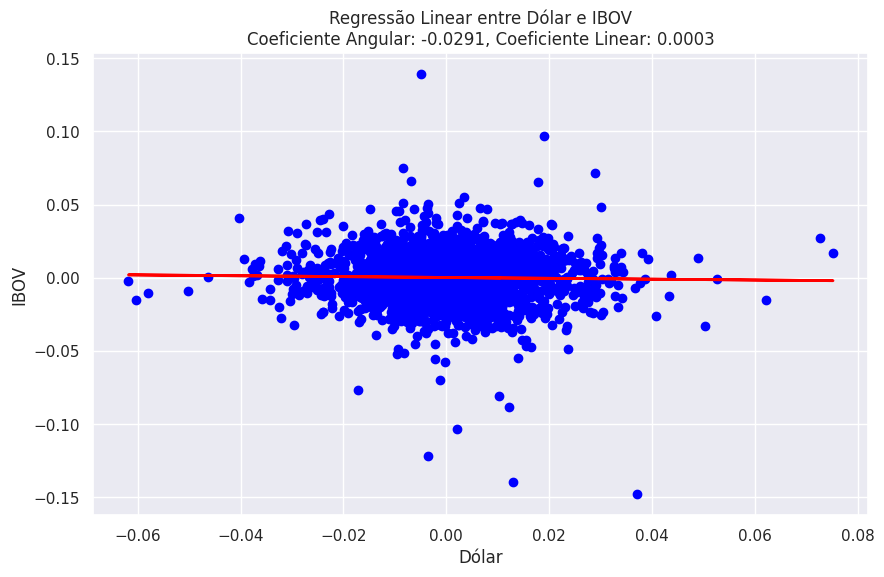

In [ ]:
print("\nAvaliação do Modelo:")
if r_squared > 0.8:
    print("R² é alto, o modelo pode ser bom.")
else:
    print("R² é moderado, verifique se é suficiente para seus objetivos.")

if r_squared_adj > 0.8:
    print("R² Ajustado é alto, sugerindo um bom ajuste.")
else:
    print("R² Ajustado é moderado, considere a parcimônia do modelo.")

# Avaliação da significância dos coeficientes
definancia = 0.05  # Nível de significância
coef_significativos = [i for i, p in enumerate(correlacoes_parciais) if p < definancia]
if coef_significativos:
    print(f"Os coeficientes {coef_significativos} são estatisticamente significativos.")
else:
    print("Nenhum coeficiente é estatisticamente significativo.")

if std_error < 0.1:
    print("Erro Padrão baixo sugere um bom ajuste.")
else:
    print("Erro Padrão é moderado, verifique a variação não explicada pelo modelo.")

# Avaliação dos resíduos
# Inclua aqui as verificações relacionadas aos resíduos

# Outras considerações de acordo com o contexto

# Análise de Variância
print("\nAnálise de Variância:")
print(model.summary())

# Valores Previstos
print("\nValores Previstos:")
print(valores_previstos)

# Resíduos
print("\nResíduos:")
print(residuos)

# Plot da reta de regressão
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], y, color='blue')
plt.plot(X[:, 1], model.predict(X), color='red', linewidth=2)
plt.title(f'Regressão Linear entre Dólar e IBOV\nCoeficiente Angular: {coeficientes[1]:.4f}, Coeficiente Linear: {coeficientes[0]:.4f}')
plt.xlabel('Dólar')
plt.ylabel('IBOV')
plt.show()
